In [1]:
%pylab inline
import glob
import numpy as np
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_together/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# PLot validation of each optimal allele in a period together

def main():
    print('Running main')
    
    folder = 't1'
    
    file_list = glob.glob('./results/results/%s/*.txt'%(folder) )
                    
    fig_num = 0
    
    for filename in file_list:
        print(filename)
        fig_num = fig_num + 1
           
        results_file = open(filename, 'r')
        lines = results_file.readlines()
        if len(lines) > 15:
            line = lines[2]
            info = line.strip().split(': ')
            motif = info[2]
            
            line = lines[11]
            info = line.strip().split(',')
            k = float(info[0])
            theta = float(info[1])
            line = lines[15]       
            info = line.strip().split(': ')
            params = info[1]
            params = params.strip().split('), ')
            #print(params)
            params_list = []
            for param in params:
                param = param[1:]
                if param[-1] == ')':
                    param = param[:-1]
                param = param.strip().split(', ')
                #print(param)
                params_list.append(((float(param[0])), float(param[1])))
                #print(params_list)
                    
                    
                    
            print(motif)
                    
                    
            svals_0 = []
            svals_1 = []
            svals_2 = []
            svals_3 = []
            params_list = params_list[0:100]
            for param in params_list:
                svals = GetGammaBins(param[0], param[1])
                svals_0.append(svals[0])
                svals_1.append(svals[1])
                svals_2.append(svals[2])
                svals_3.append(svals[3])
            svals = [svals_0, svals_1, svals_2, svals_3]
            
            fig = plt.figure(fig_num)
            # Creating axes instance 
            ax = fig.add_axes([0, 0, 1, 1]) 
            label_names = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
            # Creating plot 
            bp = ax.boxplot(svals, labels=label_names) 
            
            svals =  GetGammaBins(k, theta)
            ax.plot( 1, svals[0], marker='*',markersize=20, c = 'deeppink' ) 
            ax.plot( 2, svals[1], marker='*', markersize=20, c = 'deeppink'  ) 
            ax.plot( 3, svals[2], marker='*', markersize=20, c = 'deeppink' ) 
            ax.plot( 4, svals[3], marker='*', markersize=20, c = 'deeppink'  ) 
            
            ax.set_ylabel('Fraction of loci')
            title_name = ''
            if motif == '0.0':
                title_name = 'Period %s noncoding'%(filename[25])
            elif motif == '1.0':
                title_name ='Period 3 coding'
            else:
                title_name = ('Motif %s'%(motif))
            ax.set_title(title_name)
            # show plot 
            plt.show() 
                

Running main
./results/results/t1/per_2_6_AG_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AG


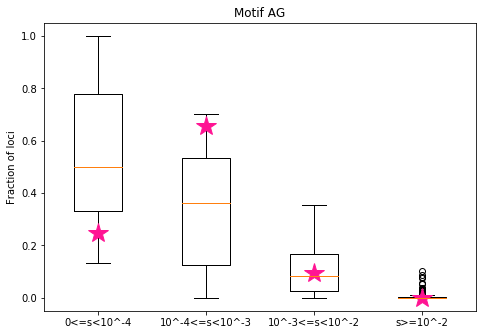

./results/results/t1/per_4_6_AAAC_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AAAC


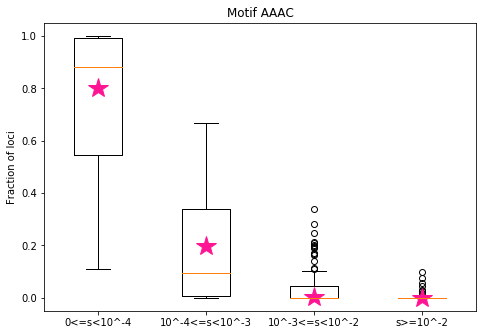

./results/results/t1/per_3_6_AGC_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AGC


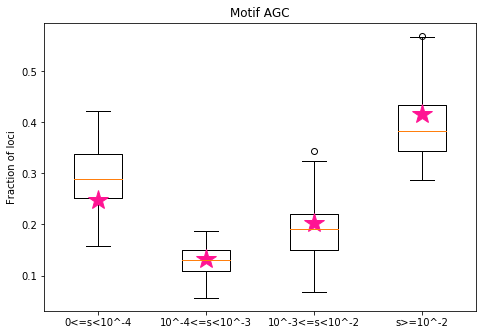

./results/results/t1/per_3_6_ACC_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
ACC


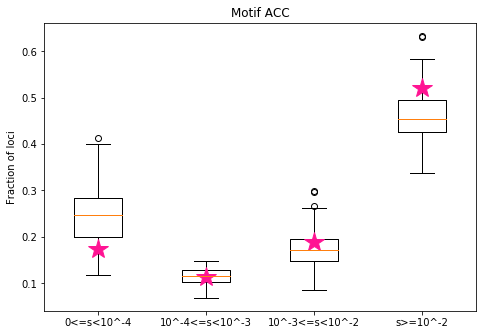

./results/results/t1/per_4_6_AAAT_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AAAT


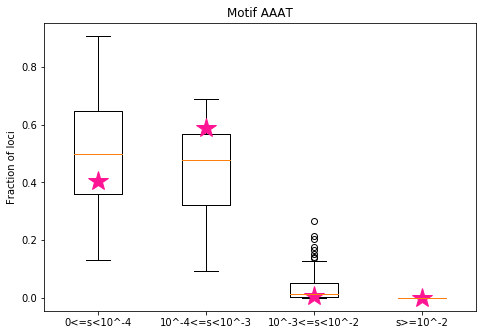

./results/results/t1/per_2_6_AT_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
./results/results/t1/per_3_7_1.0_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
1.0


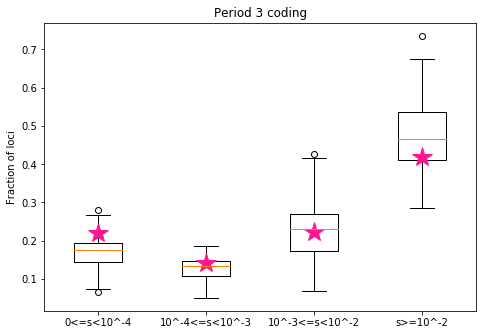

./results/results/t1/per_3_6_CCG_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
CCG


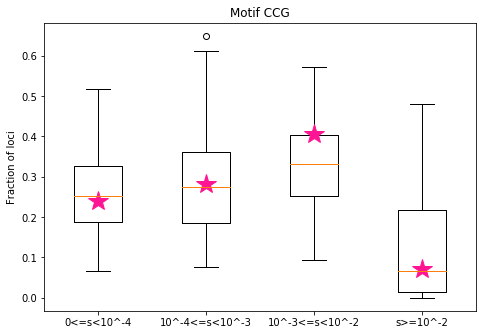

./results/results/t1/per_4_6_AATC_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AATC


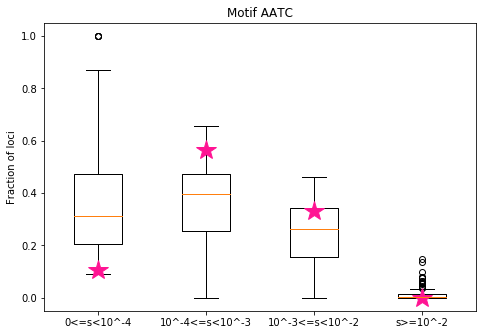

./results/results/t1/per_4_6_AGAT_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
./results/results/t1/per_4_7_0.0_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
0.0


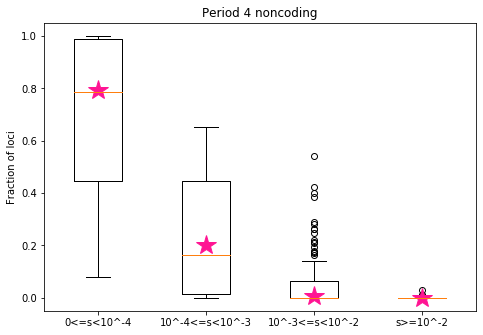

./results/results/t1/per_3_6_AGG_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AGG


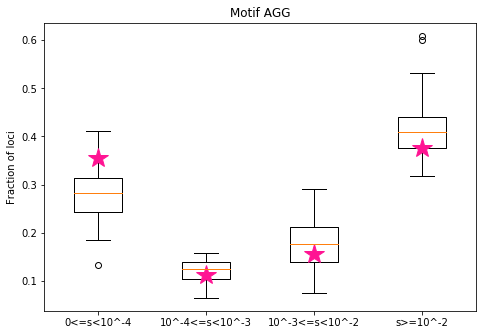

./results/results/t1/per_3_6_AAG_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AAG


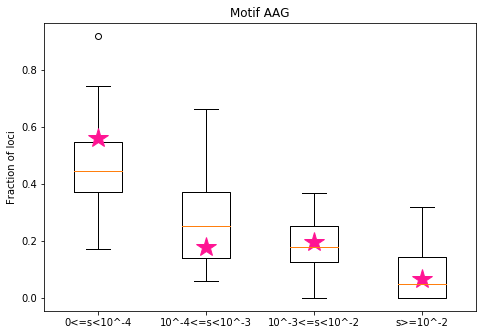

./results/results/t1/per_3_6_AAC_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AAC


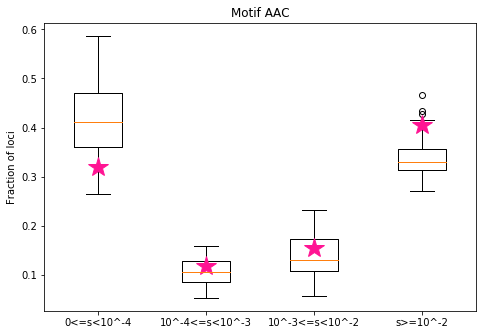

./results/results/t1/per_4_6_ATCC_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
ATCC


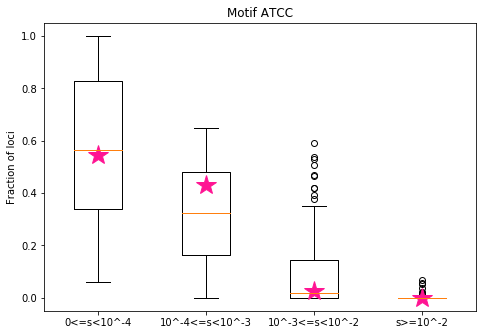

./results/results/t1/per_4_6_AATG_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AATG


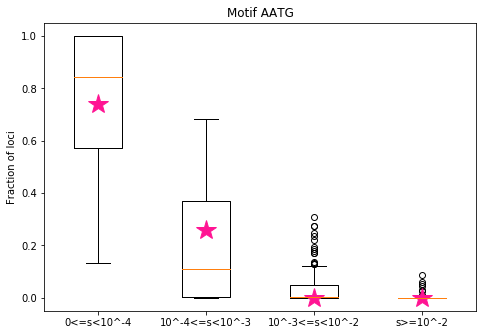

./results/results/t1/per_3_6_AAT_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
./results/results/t1/per_4_6_AAAG_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AAAG


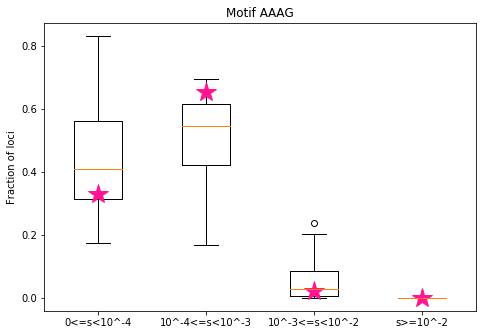

./results/results/t1/per_2_7_0.0_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
0.0


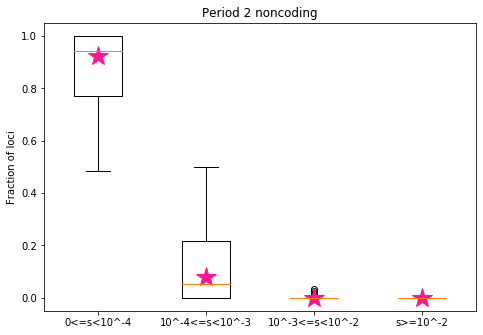

./results/results/t1/per_4_6_AAGG_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AAGG


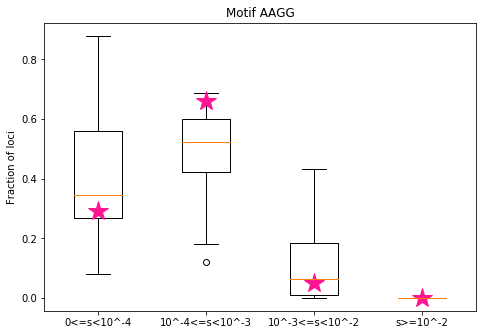

./results/results/t1/per_3_6_ATC_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
ATC


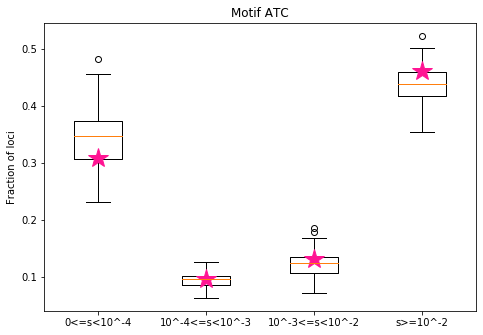

./results/results/t1/per_3_7_0.0_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
0.0


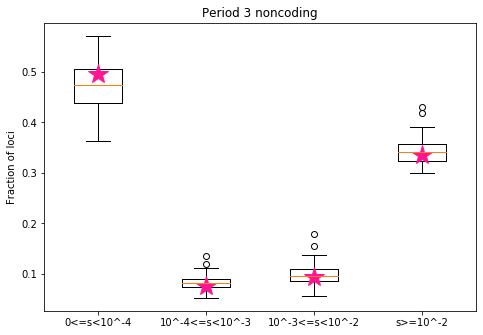

./results/results/t1/per_2_6_AC_sims_200000_het_eps_5_5_5_comm_eps_10_10_10_num_loci_1000.txt
AC


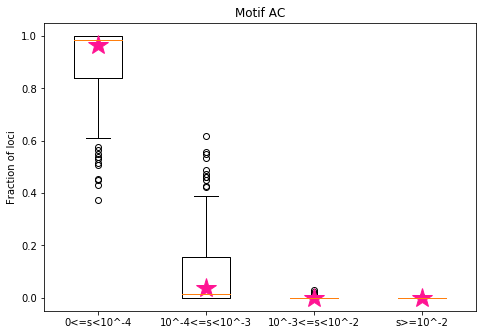

CPU times: user 2min 37s, sys: 321 ms, total: 2min 37s
Wall time: 2min 37s


In [3]:
%%time
if __name__ == '__main__':
    main()